In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [122]:
data_folder = 'data/'
data_file = '10101.csv'

In [123]:
df = pd.read_csv(data_folder + data_file)
df["time"] = df.index
df["day"] = df["time"] // 21600

mapping = {'w': 0, 'n': -1, 'r': 1}
df["state"] = df["state"].replace(mapping)
# keep only day 0

df = df[df["day"] == 0]
df["state"].value_counts()

 0    11680
-1     9104
 1      816
Name: state, dtype: int64

In [124]:
df1 = df.copy()
df1 = df1.drop(["rawState", "temp", "time", "day"], axis=1)
x = df1.drop(["state"], axis=1)
y = np.ravel(df1[["state"]])

In [125]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=13)

In [126]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [127]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=13)
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)

In [128]:
from sklearn.metrics import classification_report, confusion_matrix
cm = np.array(confusion_matrix(y_test, y_predict, labels=[0,-1,1], normalize='pred'))
confusion = pd.DataFrame(cm, index=['Wake', 'Non-Rem', 'Rem'], columns=['P Wake', 'P Non-Rem', 'P Rem'])
confusion

,P Wake,P Non-Rem,P Rem
Wake,0.947833,0.035892,0.287879
Non-Rem,0.026504,0.927664,0.424242
Rem,0.025663,0.036444,0.287879


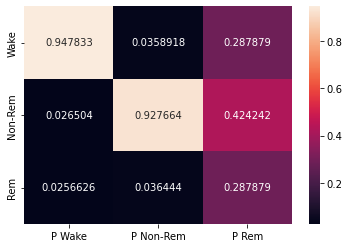

In [129]:
sns.heatmap(confusion,annot=True,fmt='g')
plt.show()

In [130]:
print(classification_report(y_test, y_predict, target_names=['Wake', 'Non-Rem', 'Rem'], zero_division=0))

              precision    recall  f1-score   support

        Wake       0.93      0.93      0.93      1799
     Non-Rem       0.95      0.96      0.95      2356
         Rem       0.29      0.23      0.26       165

    accuracy                           0.92      4320
   macro avg       0.72      0.71      0.71      4320
weighted avg       0.91      0.92      0.92      4320

